# Predicción de unidades vendidas productos RDS para el resto del 2025

## Modelo ARIMA con auto_arima

In [ ]:
# Librerías
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Base de datos
df = pd.read_excel("/Users/martincarrasco/Desktop/Martín_Carrasco/Reportes/Interanuales/Cuentas RDS/Ventas Consolidado RDS 2024-2025 (hasta 15-06-2025).xlsx", sheet_name = "Hoja1")
df = df[df["Nombre Vendedor"] == "REPUESTOS DEL SOL"]
df

,Titulo_Publicacion,Marca,Categoría,Subcategoría,Año,Mes,Fecha_Compra,Nombre Vendedor,Unidades_Vendidas,Volumen_de_Ventas_Moneda_Local
1,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,Suspensión y Dirección,Dirección Hidráulica,2024,1,2024-01-31,REPUESTOS DEL SOL,41,4919590.0
5,Cremallera Dirección Hidráulica Chevrole,GENÉRICO,Suspensión y Dirección,Dirección Hidráulica,2024,12,2024-12-31,REPUESTOS DEL SOL,37,3551630.0
9,Kit Distribucion Mitsubishi L200 2.5 200,"MITSUBOSHI, GMB, VALEO",Motores,Distribución,2024,10,2024-10-31,REPUESTOS DEL SOL,32,3199680.0
13,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,Suspensión y Dirección,Dirección Hidráulica,2024,3,2024-03-31,REPUESTOS DEL SOL,24,3101639.0
14,Kit Distribucion Mitsubishi L200 2.5 200,"MITSUBOSHI, GMB",Motores,Distribución,2024,6,2024-06-30,REPUESTOS DEL SOL,30,2999700.0
...,...,...,...,...,...,...,...,...,...,...
160164,Filtro Aceite Para Subaru Impreza 1.6 Ej,WURTEX,Filtros,Filtros de Aceite,2025,3,2025-03-31,REPUESTOS DEL SOL,1,4990.0
160167,Filtro Polen Chevrolet Spark Gt 1.2 B12d,ALTERNATIVA,Filtros,Filtros de Polen,2025,4,2025-04-30,REPUESTOS DEL SOL,1,4990.0
160174,Empaquetadura Tapa Valvula Para Changan,SANWA,Motores,Juntas,2025,4,2025-04-30,REPUESTOS DEL SOL,1,4990.0
160176,Filtro Aceite Para Nissan X-trail 2.5 Qr,MANDO,Filtros,Filtros de Aceite,2025,4,2025-04-30,REPUESTOS DEL SOL,1,4990.0


In [4]:
df.rename(columns={"Titulo_Publicacion": "Producto"}, inplace = True)
df = df[["Producto", "Marca", "Fecha_Compra", "Unidades_Vendidas"]]
df = df[
    ~((df["Fecha_Compra"].dt.year == 2025) &
      (df["Fecha_Compra"].dt.month == 6))
]
df


,Producto,Marca,Fecha_Compra,Unidades_Vendidas
1,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-01-31,41
5,Cremallera Dirección Hidráulica Chevrole,GENÉRICO,2024-12-31,37
9,Kit Distribucion Mitsubishi L200 2.5 200,"MITSUBOSHI, GMB, VALEO",2024-10-31,32
13,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-03-31,24
14,Kit Distribucion Mitsubishi L200 2.5 200,"MITSUBOSHI, GMB",2024-06-30,30
...,...,...,...,...
160164,Filtro Aceite Para Subaru Impreza 1.6 Ej,WURTEX,2025-03-31,1
160167,Filtro Polen Chevrolet Spark Gt 1.2 B12d,ALTERNATIVA,2025-04-30,1
160174,Empaquetadura Tapa Valvula Para Changan,SANWA,2025-04-30,1
160176,Filtro Aceite Para Nissan X-trail 2.5 Qr,MANDO,2025-04-30,1


In [5]:
df_agrupado = (
    df.groupby(['Producto', 'Marca', 'Fecha_Compra'], as_index=False)
      .agg({'Unidades_Vendidas': 'sum'})
)
df_agrupado

,Producto,Marca,Fecha_Compra,Unidades_Vendidas
0,Abrazadera Barra Estab Para Hyundai Tucs,HYUNDAI,2024-07-31,2
1,Absorbedor Impacto Original Hyundai Vern,HYUNDAI,2024-01-31,1
2,Absorbedor Impacto Para Original Hyundai,HYUNDAI,2024-10-31,1
3,Absorbedor Impacto Para Original Hyundai,HYUNDAI,2024-11-30,2
4,Absorbedor Impacto Para Renault Captur 2,PULO,2024-01-31,1
...,...,...,...,...
45000,ptico Izquierdo Para Hyundai Accent 200,GENÉRICO,2024-04-30,1
45001,ptico Para Kia Morning 2011 2016 Par,GENÉRICO,2024-01-31,2
45002,pticos Tuning Para Nissan V16 2003 2011,DIFORZA,2024-03-31,3
45003,pticos Tuning Para Nissan V16 2003 2011,DIFORZA,2024-05-31,2


In [6]:
productos = df["Producto"].unique()
marcas = df["Marca"].unique()

In [7]:
fechas_completas = pd.date_range(start=df['Fecha_Compra'].min(),
                                  end=df['Fecha_Compra'].max(),
                                  freq='M')

producto_marca = df[['Producto', 'Marca']].drop_duplicates()

combinaciones = (
    producto_marca.assign(key=1)
    .merge(pd.DataFrame({'Fecha_Compra': fechas_completas, 'key': 1}), on='key')
    .drop('key', axis=1)
)

df_completo = combinaciones.merge(df, 
                                  on=['Producto', 'Marca', 'Fecha_Compra'], 
                                  how='left')

df_completo['Unidades_Vendidas'] = df_completo['Unidades_Vendidas'].fillna(0)

df_completo['Unidades_Vendidas'] = df_completo['Unidades_Vendidas'].astype(int)

/var/folders/lr/rkgxn4r50h712qndyykwjmfh0000gp/T/ipykernel_71678/3332533720.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_completas = pd.date_range(start=df['Fecha_Compra'].min(),


In [8]:
df_completo

,Producto,Marca,Fecha_Compra,Unidades_Vendidas
0,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-01-31,41
1,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-02-29,14
2,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-03-31,24
3,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-04-30,5
4,Cremallera Dirección Hidráulica Chevrole,YOKOMITSU,2024-05-31,2
...,...,...,...,...
319166,Empaquetadura Tapa Valvula Para Changan,SANWA,2025-01-31,0
319167,Empaquetadura Tapa Valvula Para Changan,SANWA,2025-02-28,0
319168,Empaquetadura Tapa Valvula Para Changan,SANWA,2025-03-31,0
319169,Empaquetadura Tapa Valvula Para Changan,SANWA,2025-04-30,1


In [9]:
producto_seleccionado = "Resorte Espiral Delantero Para Toyota Ya"
marca_seleccionada = "WURTEX"

df_filtro = df_agrupado[
    (df_agrupado["Producto"] == producto_seleccionado) &
    (df_agrupado["Marca"] == marca_seleccionada)
].sort_values("Fecha_Compra")
df_filtro

,Producto,Marca,Fecha_Compra,Unidades_Vendidas
39131,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-01-31,4
39132,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-02-29,3
39133,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-03-31,4
39134,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-04-30,3
39135,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-05-31,2
39136,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-06-30,2
39137,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-07-31,4
39138,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-08-31,4
39139,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-09-30,2
39140,Resorte Espiral Delantero Para Toyota Ya,WURTEX,2024-10-31,3


In [10]:
df_train = df_filtro[df_filtro["Fecha_Compra"] < "2025-01-01"]
df_test = df_filtro[(df_filtro["Fecha_Compra"] >= "2025-01-01") & (df_filtro["Fecha_Compra"] <= "2025-05-31")]

In [11]:
y_train = df_filtro["Unidades_Vendidas"].values

modelo = auto_arima(y_train,
                    seasonal = False,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True)

predicciones = modelo.predict(n_periods=5)

/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/version

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=91.457, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.897, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=85.989, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=78.829, Time=0.00 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=73.991, Time=0.01 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=70.955, Time=0.02 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=72.911, Time=0.02 sec


/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/version

 ARIMA(4,0,2)(0,0,0)[0]             : AIC=72.824, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=74.774, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=63.891, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=62.145, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=62.328, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=62.796, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=61.049, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.467, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.543 seconds


/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/versions/rds-analisis-py310/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/martincarrasco/.pyenv/version

In [12]:
y_test = df_test["Unidades_Vendidas"].values

mae = mean_absolute_error(y_test, predicciones)
rmse = np.sqrt(mean_squared_error(y_test, predicciones))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1.83
RMSE: 2.00


In [13]:
predicciones, y_test

(array([3.78728029, 2.26739427, 2.91545649, 3.49529737, 2.94669829]),
 array([1, 3, 5, 1, 4]))

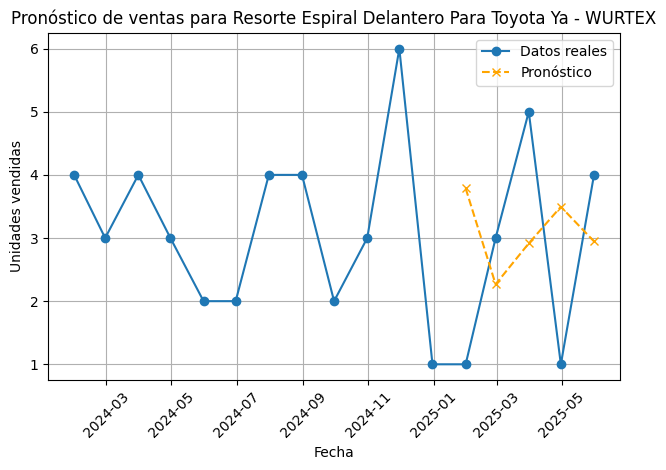

In [14]:
# Gráfica
fechas_prediccion = df_test["Fecha_Compra"]

plt.plot(df_filtro["Fecha_Compra"], df_filtro["Unidades_Vendidas"], marker = "o", label = "Datos reales")
plt.plot(fechas_prediccion, predicciones, label = "Pronóstico", marker = "x", linestyle = "--", color = "orange")
plt.title(f'Pronóstico de ventas para {producto_seleccionado} - {marca_seleccionada}')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()